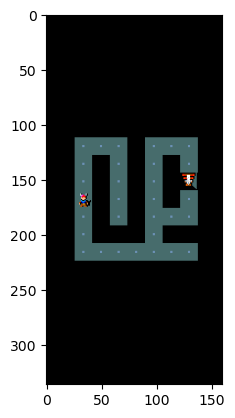

In [57]:

import time

import gym
import minihack
from matplotlib import pyplot as plt

# from utils.utils import get_target_location, get_player_location, get_valid_moves
# Create the MiniHack environment
env = gym.make(
    "MiniHack-MazeWalk-Mapped-9x9-v0",
    observation_keys=("chars", "pixel"),
)


# Reset the environment to get the initial observation
state = env.reset()
game_map = state['chars']
plt.imshow(state['pixel'][:, 550:710, :])

In [82]:
import pandas as pd
df = pd.read_csv('results2.csv', index_col=0)
# df.sort_values(by=['path_length'], ascending=True, inplace=True)
# df = df[df['maze'] == 'MiniHack-MazeWalk-Mapped-45x19-v0_1']
df.head(100)

,name,time_mean,time_std,explored_mean,explored_std,path_length_mean,path_length_std
0,ASTAR-Chebysev-Env1,0.019454,0.024294,197.3,121.834177,93.4,66.171830
1,ASTAR-Chebysev-Env2,0.016464,0.021212,40.1,25.770138,22.3,12.419071
2,ASTAR-Chebysev-Env3,0.016596,0.023921,13.0,7.944250,9.1,4.254409
3,ASTAR-EUCLIDEAN-Env1,0.019090,0.021408,195.2,122.342688,93.4,66.171830
4,ASTAR-EUCLIDEAN-Env2,0.035336,0.079566,38.3,24.957965,22.3,12.419071
5,ASTAR-EUCLIDEAN-Env3,0.018776,0.030307,12.4,7.791734,9.1,4.254409
6,ASTAR-Manhattan-Env1,0.031597,0.061388,192.4,122.341235,93.4,66.171830
7,ASTAR-Manhattan-Env2,0.017361,0.023280,37.3,25.586672,22.3,12.419071
8,ASTAR-Manhattan-Env3,0.016306,0.021710,11.6,7.791734,9.1,4.254409
9,ASTAR-SManhattan-Env1,0.018370,0.022877,170.3,115.299658,93.4,66.171830
